In [1]:
import sys
sys.path.append("/mnt/d/DKE/MRP1_SizeMatters/Size-Matters/framework")
sys.path.append("/mnt/d/DKE/MRP1_SizeMatters/Size-Matters/application")


import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
from captum.attr import LayerConductance

import train_utils
from NetworkClass import Network

## Create Model from Network Class and Define Dataloaders for MNIST from torchvision
Batch size test can be varied to generate conductance values over a larger set of inputs. Train batch can also be changed for faster learning within an epoch

In [4]:

batch_size_train = 64
batch_size_test = 1000
n_epochs = 10
learning_rate = 0.01
momentum = 0.5
log_interval = 10
random_seed = 1

    
model_dict = {
        "network":{
            'input_layer': {
                "units": 784,
                
                },
            'hidden_layer': [{
                    "units": 500, 
                    "activation": "relu",
                    "type": "Linear"
                }, 
                {
                    "units": 300, 
                    "activation": "relu",
                    "type": "Linear"

                }],
            'output_layer': {
                "units": 10,
                "activation": "softmax",
                "type": "Linear"
                }
        }
    }

model = Network(model_dict)


train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,)), train_utils.ReshapeTransform((-1,))
                             ])),
  batch_size=batch_size_train, shuffle=True)


test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,)), train_utils.ReshapeTransform((-1,))
                             ])),
  batch_size=batch_size_test, shuffle=True)




softmax


## Define Loss and Optimizer

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


## Training and Eval Loop
Train and Test functions are defined in the train_utils in the application folder. Contains functions that perform training and optimizer updates

In [6]:
for epoch in range(1, n_epochs + 1):
  train_utils.train(model, optimizer, criterion, epoch, train_loader)
  train_utils.test(model, criterion, test_loader)  

/mnt/d/DKE/MRP1_SizeMatters/Size-Matters/framework/NetworkClass.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.activation_scheme[-1](self.output_layer(x))


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303721
Train Epoch: 1 [320/60000 (1%)]	Loss: 2.299482
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.300844
Train Epoch: 1 [960/60000 (2%)]	Loss: 2.301955
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.305435
Train Epoch: 1 [1600/60000 (3%)]	Loss: 2.302344
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.300339
Train Epoch: 1 [2240/60000 (4%)]	Loss: 2.299618
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.302833
Train Epoch: 1 [2880/60000 (5%)]	Loss: 2.300390
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.298347
Train Epoch: 1 [3520/60000 (6%)]	Loss: 2.300662
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.298316
Train Epoch: 1 [4160/60000 (7%)]	Loss: 2.298782
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.298182
Train Epoch: 1 [4800/60000 (8%)]	Loss: 2.302619
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.301399
Train Epoch: 1 [5440/60000 (9%)]	Loss: 2.297861
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.299665
Train Epoch: 1 [6080/60000 (10%)]	Loss: 2.299612
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.29

Train Epoch: 1 [53120/60000 (88%)]	Loss: 2.151818
Train Epoch: 1 [53440/60000 (89%)]	Loss: 2.166090
Train Epoch: 1 [53760/60000 (90%)]	Loss: 2.176619
Train Epoch: 1 [54080/60000 (90%)]	Loss: 2.180782
Train Epoch: 1 [54400/60000 (91%)]	Loss: 2.136632
Train Epoch: 1 [54720/60000 (91%)]	Loss: 2.086280
Train Epoch: 1 [55040/60000 (92%)]	Loss: 2.165970
Train Epoch: 1 [55360/60000 (92%)]	Loss: 2.151567
Train Epoch: 1 [55680/60000 (93%)]	Loss: 2.153484
Train Epoch: 1 [56000/60000 (93%)]	Loss: 2.094476
Train Epoch: 1 [56320/60000 (94%)]	Loss: 2.149308
Train Epoch: 1 [56640/60000 (94%)]	Loss: 2.098560
Train Epoch: 1 [56960/60000 (95%)]	Loss: 2.089713
Train Epoch: 1 [57280/60000 (95%)]	Loss: 2.116840
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.090718
Train Epoch: 1 [57920/60000 (96%)]	Loss: 2.032677
Train Epoch: 1 [58240/60000 (97%)]	Loss: 2.117177
Train Epoch: 1 [58560/60000 (98%)]	Loss: 2.100690
Train Epoch: 1 [58880/60000 (98%)]	Loss: 2.138935
Train Epoch: 1 [59200/60000 (99%)]	Loss: 2.035185


Train Epoch: 2 [45760/60000 (76%)]	Loss: 1.804388
Train Epoch: 2 [46080/60000 (77%)]	Loss: 1.845777
Train Epoch: 2 [46400/60000 (77%)]	Loss: 1.821384
Train Epoch: 2 [46720/60000 (78%)]	Loss: 1.786310
Train Epoch: 2 [47040/60000 (78%)]	Loss: 1.745079
Train Epoch: 2 [47360/60000 (79%)]	Loss: 1.877837
Train Epoch: 2 [47680/60000 (79%)]	Loss: 1.764470
Train Epoch: 2 [48000/60000 (80%)]	Loss: 1.748384
Train Epoch: 2 [48320/60000 (80%)]	Loss: 1.776536
Train Epoch: 2 [48640/60000 (81%)]	Loss: 1.768607
Train Epoch: 2 [48960/60000 (82%)]	Loss: 1.661600
Train Epoch: 2 [49280/60000 (82%)]	Loss: 1.780904
Train Epoch: 2 [49600/60000 (83%)]	Loss: 1.754165
Train Epoch: 2 [49920/60000 (83%)]	Loss: 1.776848
Train Epoch: 2 [50240/60000 (84%)]	Loss: 1.793892
Train Epoch: 2 [50560/60000 (84%)]	Loss: 1.798051
Train Epoch: 2 [50880/60000 (85%)]	Loss: 1.824717
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.804002
Train Epoch: 2 [51520/60000 (86%)]	Loss: 1.799671
Train Epoch: 2 [51840/60000 (86%)]	Loss: 1.691166


Train Epoch: 3 [38720/60000 (64%)]	Loss: 1.761003
Train Epoch: 3 [39040/60000 (65%)]	Loss: 1.758491
Train Epoch: 3 [39360/60000 (66%)]	Loss: 1.713389
Train Epoch: 3 [39680/60000 (66%)]	Loss: 1.755398
Train Epoch: 3 [40000/60000 (67%)]	Loss: 1.774863
Train Epoch: 3 [40320/60000 (67%)]	Loss: 1.745763
Train Epoch: 3 [40640/60000 (68%)]	Loss: 1.711040
Train Epoch: 3 [40960/60000 (68%)]	Loss: 1.755902
Train Epoch: 3 [41280/60000 (69%)]	Loss: 1.782050
Train Epoch: 3 [41600/60000 (69%)]	Loss: 1.795760
Train Epoch: 3 [41920/60000 (70%)]	Loss: 1.646767
Train Epoch: 3 [42240/60000 (70%)]	Loss: 1.728007
Train Epoch: 3 [42560/60000 (71%)]	Loss: 1.720614
Train Epoch: 3 [42880/60000 (71%)]	Loss: 1.723709
Train Epoch: 3 [43200/60000 (72%)]	Loss: 1.796477
Train Epoch: 3 [43520/60000 (72%)]	Loss: 1.748104
Train Epoch: 3 [43840/60000 (73%)]	Loss: 1.794244
Train Epoch: 3 [44160/60000 (74%)]	Loss: 1.717789
Train Epoch: 3 [44480/60000 (74%)]	Loss: 1.740988
Train Epoch: 3 [44800/60000 (75%)]	Loss: 1.779732


Train Epoch: 4 [32000/60000 (53%)]	Loss: 1.767191
Train Epoch: 4 [32320/60000 (54%)]	Loss: 1.683530
Train Epoch: 4 [32640/60000 (54%)]	Loss: 1.731254
Train Epoch: 4 [32960/60000 (55%)]	Loss: 1.718794
Train Epoch: 4 [33280/60000 (55%)]	Loss: 1.815539
Train Epoch: 4 [33600/60000 (56%)]	Loss: 1.631566
Train Epoch: 4 [33920/60000 (57%)]	Loss: 1.701704
Train Epoch: 4 [34240/60000 (57%)]	Loss: 1.715764
Train Epoch: 4 [34560/60000 (58%)]	Loss: 1.711141
Train Epoch: 4 [34880/60000 (58%)]	Loss: 1.709243
Train Epoch: 4 [35200/60000 (59%)]	Loss: 1.710161
Train Epoch: 4 [35520/60000 (59%)]	Loss: 1.827542
Train Epoch: 4 [35840/60000 (60%)]	Loss: 1.683049
Train Epoch: 4 [36160/60000 (60%)]	Loss: 1.711821
Train Epoch: 4 [36480/60000 (61%)]	Loss: 1.721266
Train Epoch: 4 [36800/60000 (61%)]	Loss: 1.593621
Train Epoch: 4 [37120/60000 (62%)]	Loss: 1.664614
Train Epoch: 4 [37440/60000 (62%)]	Loss: 1.700023
Train Epoch: 4 [37760/60000 (63%)]	Loss: 1.742538
Train Epoch: 4 [38080/60000 (63%)]	Loss: 1.755269


Train Epoch: 5 [24960/60000 (42%)]	Loss: 1.621409
Train Epoch: 5 [25280/60000 (42%)]	Loss: 1.657928
Train Epoch: 5 [25600/60000 (43%)]	Loss: 1.614779
Train Epoch: 5 [25920/60000 (43%)]	Loss: 1.612622
Train Epoch: 5 [26240/60000 (44%)]	Loss: 1.636612
Train Epoch: 5 [26560/60000 (44%)]	Loss: 1.596997
Train Epoch: 5 [26880/60000 (45%)]	Loss: 1.635792
Train Epoch: 5 [27200/60000 (45%)]	Loss: 1.556885
Train Epoch: 5 [27520/60000 (46%)]	Loss: 1.578622
Train Epoch: 5 [27840/60000 (46%)]	Loss: 1.653242
Train Epoch: 5 [28160/60000 (47%)]	Loss: 1.640073
Train Epoch: 5 [28480/60000 (47%)]	Loss: 1.570343
Train Epoch: 5 [28800/60000 (48%)]	Loss: 1.674050
Train Epoch: 5 [29120/60000 (49%)]	Loss: 1.658659
Train Epoch: 5 [29440/60000 (49%)]	Loss: 1.588820
Train Epoch: 5 [29760/60000 (50%)]	Loss: 1.644539
Train Epoch: 5 [30080/60000 (50%)]	Loss: 1.587695
Train Epoch: 5 [30400/60000 (51%)]	Loss: 1.605482
Train Epoch: 5 [30720/60000 (51%)]	Loss: 1.556790
Train Epoch: 5 [31040/60000 (52%)]	Loss: 1.553443


Train Epoch: 6 [17280/60000 (29%)]	Loss: 1.599891
Train Epoch: 6 [17600/60000 (29%)]	Loss: 1.637784
Train Epoch: 6 [17920/60000 (30%)]	Loss: 1.629084
Train Epoch: 6 [18240/60000 (30%)]	Loss: 1.573645
Train Epoch: 6 [18560/60000 (31%)]	Loss: 1.634340
Train Epoch: 6 [18880/60000 (31%)]	Loss: 1.612008
Train Epoch: 6 [19200/60000 (32%)]	Loss: 1.614146
Train Epoch: 6 [19520/60000 (33%)]	Loss: 1.579892
Train Epoch: 6 [19840/60000 (33%)]	Loss: 1.625414
Train Epoch: 6 [20160/60000 (34%)]	Loss: 1.524114
Train Epoch: 6 [20480/60000 (34%)]	Loss: 1.576228
Train Epoch: 6 [20800/60000 (35%)]	Loss: 1.596102
Train Epoch: 6 [21120/60000 (35%)]	Loss: 1.552655
Train Epoch: 6 [21440/60000 (36%)]	Loss: 1.583256
Train Epoch: 6 [21760/60000 (36%)]	Loss: 1.586564
Train Epoch: 6 [22080/60000 (37%)]	Loss: 1.592702
Train Epoch: 6 [22400/60000 (37%)]	Loss: 1.548312
Train Epoch: 6 [22720/60000 (38%)]	Loss: 1.614348
Train Epoch: 6 [23040/60000 (38%)]	Loss: 1.597975
Train Epoch: 6 [23360/60000 (39%)]	Loss: 1.550230


Train Epoch: 7 [9600/60000 (16%)]	Loss: 1.563561
Train Epoch: 7 [9920/60000 (17%)]	Loss: 1.539851
Train Epoch: 7 [10240/60000 (17%)]	Loss: 1.564091
Train Epoch: 7 [10560/60000 (18%)]	Loss: 1.523944
Train Epoch: 7 [10880/60000 (18%)]	Loss: 1.592244
Train Epoch: 7 [11200/60000 (19%)]	Loss: 1.584944
Train Epoch: 7 [11520/60000 (19%)]	Loss: 1.548639
Train Epoch: 7 [11840/60000 (20%)]	Loss: 1.526479
Train Epoch: 7 [12160/60000 (20%)]	Loss: 1.568667
Train Epoch: 7 [12480/60000 (21%)]	Loss: 1.588178
Train Epoch: 7 [12800/60000 (21%)]	Loss: 1.571526
Train Epoch: 7 [13120/60000 (22%)]	Loss: 1.599202
Train Epoch: 7 [13440/60000 (22%)]	Loss: 1.617459
Train Epoch: 7 [13760/60000 (23%)]	Loss: 1.565454
Train Epoch: 7 [14080/60000 (23%)]	Loss: 1.568001
Train Epoch: 7 [14400/60000 (24%)]	Loss: 1.582480
Train Epoch: 7 [14720/60000 (25%)]	Loss: 1.580008
Train Epoch: 7 [15040/60000 (25%)]	Loss: 1.582085
Train Epoch: 7 [15360/60000 (26%)]	Loss: 1.581625
Train Epoch: 7 [15680/60000 (26%)]	Loss: 1.531553
Tr

Train Epoch: 8 [2240/60000 (4%)]	Loss: 1.539057
Train Epoch: 8 [2560/60000 (4%)]	Loss: 1.574430
Train Epoch: 8 [2880/60000 (5%)]	Loss: 1.523552
Train Epoch: 8 [3200/60000 (5%)]	Loss: 1.613076
Train Epoch: 8 [3520/60000 (6%)]	Loss: 1.549041
Train Epoch: 8 [3840/60000 (6%)]	Loss: 1.583869
Train Epoch: 8 [4160/60000 (7%)]	Loss: 1.586206
Train Epoch: 8 [4480/60000 (7%)]	Loss: 1.540670
Train Epoch: 8 [4800/60000 (8%)]	Loss: 1.613853
Train Epoch: 8 [5120/60000 (9%)]	Loss: 1.584953
Train Epoch: 8 [5440/60000 (9%)]	Loss: 1.552204
Train Epoch: 8 [5760/60000 (10%)]	Loss: 1.562727
Train Epoch: 8 [6080/60000 (10%)]	Loss: 1.517715
Train Epoch: 8 [6400/60000 (11%)]	Loss: 1.595041
Train Epoch: 8 [6720/60000 (11%)]	Loss: 1.608607
Train Epoch: 8 [7040/60000 (12%)]	Loss: 1.541851
Train Epoch: 8 [7360/60000 (12%)]	Loss: 1.542489
Train Epoch: 8 [7680/60000 (13%)]	Loss: 1.586135
Train Epoch: 8 [8000/60000 (13%)]	Loss: 1.586803
Train Epoch: 8 [8320/60000 (14%)]	Loss: 1.571527
Train Epoch: 8 [8640/60000 (14%

Train Epoch: 8 [55040/60000 (92%)]	Loss: 1.570414
Train Epoch: 8 [55360/60000 (92%)]	Loss: 1.535906
Train Epoch: 8 [55680/60000 (93%)]	Loss: 1.541057
Train Epoch: 8 [56000/60000 (93%)]	Loss: 1.552513
Train Epoch: 8 [56320/60000 (94%)]	Loss: 1.537486
Train Epoch: 8 [56640/60000 (94%)]	Loss: 1.516473
Train Epoch: 8 [56960/60000 (95%)]	Loss: 1.516570
Train Epoch: 8 [57280/60000 (95%)]	Loss: 1.515565
Train Epoch: 8 [57600/60000 (96%)]	Loss: 1.575065
Train Epoch: 8 [57920/60000 (96%)]	Loss: 1.582265
Train Epoch: 8 [58240/60000 (97%)]	Loss: 1.620636
Train Epoch: 8 [58560/60000 (98%)]	Loss: 1.513462
Train Epoch: 8 [58880/60000 (98%)]	Loss: 1.541234
Train Epoch: 8 [59200/60000 (99%)]	Loss: 1.596354
Train Epoch: 8 [59520/60000 (99%)]	Loss: 1.536646
Train Epoch: 8 [59840/60000 (100%)]	Loss: 1.533511

Test set: Avg. loss: 0.0016, Accuracy: 9199/10000 (92%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 1.576566
Train Epoch: 9 [320/60000 (1%)]	Loss: 1.628950
Train Epoch: 9 [640/60000 (1%)]	Loss: 1.564579
Tr

Train Epoch: 9 [48320/60000 (80%)]	Loss: 1.521914
Train Epoch: 9 [48640/60000 (81%)]	Loss: 1.577672
Train Epoch: 9 [48960/60000 (82%)]	Loss: 1.525615
Train Epoch: 9 [49280/60000 (82%)]	Loss: 1.517529
Train Epoch: 9 [49600/60000 (83%)]	Loss: 1.531134
Train Epoch: 9 [49920/60000 (83%)]	Loss: 1.543468
Train Epoch: 9 [50240/60000 (84%)]	Loss: 1.524813
Train Epoch: 9 [50560/60000 (84%)]	Loss: 1.549034
Train Epoch: 9 [50880/60000 (85%)]	Loss: 1.609660
Train Epoch: 9 [51200/60000 (85%)]	Loss: 1.557170
Train Epoch: 9 [51520/60000 (86%)]	Loss: 1.517468
Train Epoch: 9 [51840/60000 (86%)]	Loss: 1.502010
Train Epoch: 9 [52160/60000 (87%)]	Loss: 1.562061
Train Epoch: 9 [52480/60000 (87%)]	Loss: 1.594303
Train Epoch: 9 [52800/60000 (88%)]	Loss: 1.582222
Train Epoch: 9 [53120/60000 (88%)]	Loss: 1.555772
Train Epoch: 9 [53440/60000 (89%)]	Loss: 1.556890
Train Epoch: 9 [53760/60000 (90%)]	Loss: 1.626676
Train Epoch: 9 [54080/60000 (90%)]	Loss: 1.548650
Train Epoch: 9 [54400/60000 (91%)]	Loss: 1.577348


Train Epoch: 10 [40000/60000 (67%)]	Loss: 1.557573
Train Epoch: 10 [40320/60000 (67%)]	Loss: 1.550046
Train Epoch: 10 [40640/60000 (68%)]	Loss: 1.532442
Train Epoch: 10 [40960/60000 (68%)]	Loss: 1.589409
Train Epoch: 10 [41280/60000 (69%)]	Loss: 1.551416
Train Epoch: 10 [41600/60000 (69%)]	Loss: 1.507970
Train Epoch: 10 [41920/60000 (70%)]	Loss: 1.547872
Train Epoch: 10 [42240/60000 (70%)]	Loss: 1.565034
Train Epoch: 10 [42560/60000 (71%)]	Loss: 1.607830
Train Epoch: 10 [42880/60000 (71%)]	Loss: 1.471312
Train Epoch: 10 [43200/60000 (72%)]	Loss: 1.545200
Train Epoch: 10 [43520/60000 (72%)]	Loss: 1.549655
Train Epoch: 10 [43840/60000 (73%)]	Loss: 1.569718
Train Epoch: 10 [44160/60000 (74%)]	Loss: 1.563694
Train Epoch: 10 [44480/60000 (74%)]	Loss: 1.575871
Train Epoch: 10 [44800/60000 (75%)]	Loss: 1.574639
Train Epoch: 10 [45120/60000 (75%)]	Loss: 1.588249
Train Epoch: 10 [45440/60000 (76%)]	Loss: 1.569906
Train Epoch: 10 [45760/60000 (76%)]	Loss: 1.580069
Train Epoch: 10 [46080/60000 (7

## Layer Conductance is used to find the Importance of Neurons within that layer.
From Captum docs: Layer attributions allow us to understand the importance of all the neurons in the output of a particular layer. For this example, we will be using Layer Conductance, one of the Layer Attribution methods in Captum, which is an extension of Integrated Gradients applied to hidden neurons

In [7]:
cond = LayerConductance(model, model.hidden_layers[0])


In [8]:
# Get one batch of test data - number of samples defined in batch-size
test_data, test_target = next(iter(test_loader))

In [9]:
test_data.shape

torch.Size([1000, 784])

In [10]:
# Give the test_data tensor and the corresponding targets. could also be done over all possible targets and then classwise averages can be taken.
cond_vals = cond.attribute(test_data,target=test_target)
cond_vals = cond_vals.detach().numpy()

In [11]:
def visualize_importances(feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"):
    print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(12,6))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xlabel(axis_title)
        plt.title(title)


Average Feature Importances
0 :  0.007
1 :  0.002
2 :  0.004
3 :  0.005
4 :  -0.000
5 :  0.005
6 :  0.005
7 :  0.002
8 :  0.001
9 :  0.003
10 :  0.002
11 :  0.002
12 :  0.002
13 :  0.002
14 :  0.000
15 :  0.004
16 :  0.000
17 :  0.009
18 :  0.000
19 :  0.001
20 :  0.009
21 :  0.009
22 :  0.000
23 :  0.000
24 :  0.000
25 :  0.003
26 :  -0.000
27 :  0.002
28 :  0.004
29 :  0.001
30 :  0.001
31 :  0.005
32 :  0.003
33 :  0.002
34 :  0.000
35 :  0.002
36 :  0.004
37 :  0.005
38 :  0.004
39 :  0.007
40 :  0.000
41 :  0.003
42 :  0.004
43 :  0.002
44 :  0.010
45 :  -0.000
46 :  0.002
47 :  0.000
48 :  0.002
49 :  0.005
50 :  0.000
51 :  0.003
52 :  0.002
53 :  0.000
54 :  0.000
55 :  0.000
56 :  0.004
57 :  0.000
58 :  0.004
59 :  0.005
60 :  0.002
61 :  0.002
62 :  0.008
63 :  0.002
64 :  0.001
65 :  0.005
66 :  0.004
67 :  0.001
68 :  0.002
69 :  0.004
70 :  0.000
71 :  0.002
72 :  0.001
73 :  0.003
74 :  0.001
75 :  0.005
76 :  0.005
77 :  -0.000
78 :  0.010
79 :  0.003
80 :  0.006
81 :  

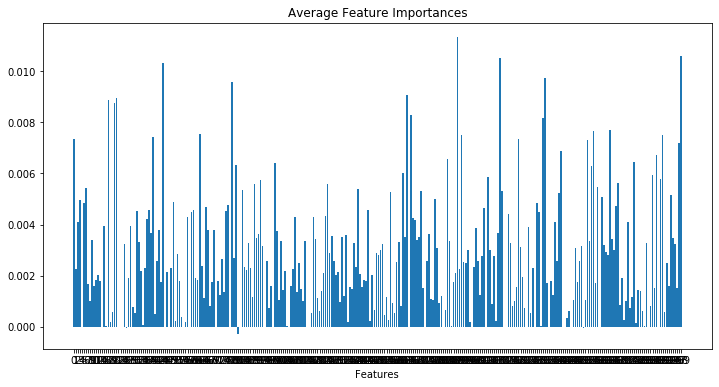

In [18]:
# Range for number of hidden units in the layer
visualize_importances(range(model.hidden_layers[0].out_features), np.mean(cond_vals, axis=0))